<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/Kittipak_Car_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

np.random.seed(1992)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.xls to ToyotaCorolla.xls


In [3]:
df = pd.read_excel("ToyotaCorolla.xls", sheet_name="data")
df.tail(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,0,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
# Feature Selection

df = df[['Automatic_airco','Boardcomputer','KM', 'Mfg_Year', 'Price','Weight']]
df

,Automatic_airco,Boardcomputer,KM,Mfg_Year,Price,Weight
0,0,1,46986,2002,13500,1165
1,0,1,72937,2002,13750,1165
2,0,1,41711,2002,13950,1165
3,0,1,48000,2002,14950,1165
4,0,1,38500,2002,13750,1170
...,...,...,...,...,...,...
1431,0,0,20544,1998,7500,1025
1432,0,0,19000,1998,10845,1015
1433,0,0,17016,1998,8500,1015
1434,0,0,16916,1998,7250,1015


In [5]:
X = df.drop(['Price'], axis=1).values #axis = 1 means column
Y = df.loc[:, 'Price'].values # เอาทุก rows แต่เอาเฉพาะ column Price

In [6]:
# numrows = df.shape[0]

numcols = df.shape[1]
num_col = len(df.columns)
num_col

6

In [7]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split( X, Y, train_size=0.7, random_state=1992 )

In [8]:
X_Train.shape

(1005, 5)

In [9]:
# scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

In [10]:
X_Test.shape

(431, 5)

In [11]:
from keras import optimizers

model = Sequential()
model.add(Dense(units=10,activation='relu', input_shape=(numcols-1,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1))

opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,  loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


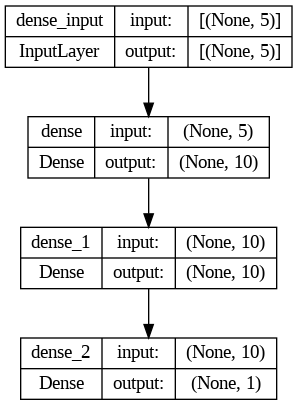

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [14]:
len(model.layers)

3

In [15]:
X_Train

array([[-0.26079255, -0.65232807, -0.16224546,  0.23330784,  0.02501668],
       [-0.26079255,  1.53297097,  2.41006613,  0.87394823,  0.65899476],
       [ 3.83446541,  1.53297097, -1.8032625 ,  2.79586939,  1.02126794],
       ...,
       [-0.26079255, -0.65232807,  0.10797927, -1.04797293,  0.02501668],
       [ 3.83446541,  1.53297097, -1.67058543,  2.155229  ,  1.02126794],
       [-0.26079255,  1.53297097, -0.48620639,  0.87394823,  0.02501668]])

In [16]:
X_Train.shape

(1005, 5)

In [17]:
#model.fit(xTrain, yTrain, batch_size=64, epochs=300)
#history = model.fit(xTrain, yTrain, batch_size=64, epochs=300)
history = model.fit(X_Train, Y_Train, validation_split=0.33, batch_size=64, epochs=300)
#history = model.fit(xTrain, yTrain, validation_split=0.33, batch_size=64, epochs=1500)


Epoch 1/300
11/11 [==============================] - 3s 51ms/step - loss: 130311152.0000 - val_loss: 129349816.0000
Epoch 2/300
11/11 [==============================] - 0s 16ms/step - loss: 130255000.0000 - val_loss: 129267264.0000
Epoch 3/300
11/11 [==============================] - 0s 9ms/step - loss: 130140360.0000 - val_loss: 129096224.0000
Epoch 4/300
11/11 [==============================] - 0s 10ms/step - loss: 129906472.0000 - val_loss: 128754504.0000
Epoch 5/300
11/11 [==============================] - 0s 18ms/step - loss: 129441984.0000 - val_loss: 128124360.0000
Epoch 6/300
11/11 [==============================] - 0s 10ms/step - loss: 128646728.0000 - val_loss: 127053512.0000
Epoch 7/300
11/11 [==============================] - 0s 8ms/step - loss: 127318216.0000 - val_loss: 125409872.0000
Epoch 8/300
11/11 [==============================] - 0s 10ms/step - loss: 125366000.0000 - val_loss: 123015800.0000
Epoch 9/300
11/11 [==============================] - 0s 11ms/step - loss: 

In [18]:
#make prediction
y_pred = model.predict(X_Test)

14/14 [==============================] - 0s 1ms/step


In [19]:
y_pred

array([[ 9463.456 ],
       [ 7234.2397],
       [18398.129 ],
       [ 9107.915 ],
       [ 8181.657 ],
       [13083.734 ],
       [ 7394.881 ],
       [11132.096 ],
       [ 8057.423 ],
       [ 9603.611 ],
       [ 9244.142 ],
       [10255.896 ],
       [12255.818 ],
       [ 8226.725 ],
       [ 8478.403 ],
       [ 9756.961 ],
       [ 9076.361 ],
       [ 8513.01  ],
       [14195.709 ],
       [12875.379 ],
       [ 7388.173 ],
       [10199.74  ],
       [11562.243 ],
       [ 9712.64  ],
       [12570.55  ],
       [ 7816.49  ],
       [10872.284 ],
       [11277.723 ],
       [ 8323.402 ],
       [ 8957.339 ],
       [ 7998.9023],
       [ 9077.163 ],
       [ 7141.546 ],
       [ 8607.906 ],
       [ 8541.951 ],
       [13164.    ],
       [ 9346.569 ],
       [13055.636 ],
       [12712.658 ],
       [10915.54  ],
       [ 9531.5625],
       [ 8252.197 ],
       [ 9939.633 ],
       [10520.344 ],
       [ 9406.122 ],
       [13045.975 ],
       [ 8383.657 ],
       [ 8716

In [20]:
len(model.layers)

3

In [21]:
# Calculate Mean Square Error
MSE = np.square(np.subtract(Y_Test, y_pred)).mean()
MSE

21643534.98215336

In [22]:
RMSE = math.sqrt(MSE)
print(RMSE)

4652.261276213252
